In [1]:
# Load in the essentials
import mkl
import pandas as pd
import numpy as np

# Load in visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in the dataset
dataset = pd.read_csv('50_startups.csv')
dataset.head() # Show top 5 rows

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Create a statistical summary table
stats_summary = dataset.describe()
stats_summary

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
# Create a correlation table
correlation_table = dataset.corr()
correlation_table

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [5]:
# Enable inline plotting
%matplotlib inline 

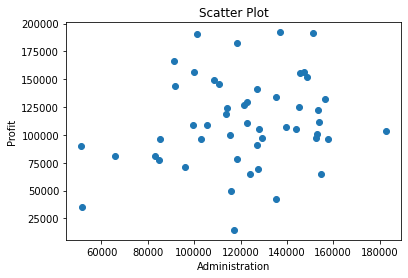

In [6]:
# Create a scatter plot
x = dataset['Administration']
y = dataset['Profit']
plt.scatter(x,y)
plt.title("Scatter Plot")
plt.xlabel('Administration')
plt.ylabel('Profit'); # Semicolon takes away unnecessary info

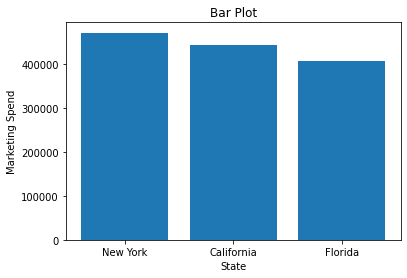

In [7]:
# Create a bar plot
plt.bar(dataset['State'],dataset['Marketing Spend'])
plt.title("Bar Plot")
plt.xlabel('State')
plt.ylabel('Marketing Spend');

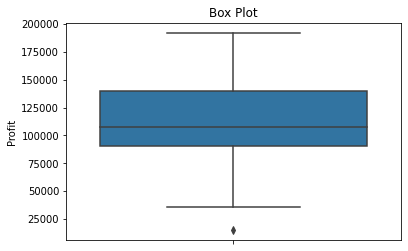

In [8]:
# Create a box plot
sns.boxplot(y='Profit', data=dataset)
plt.title("Box Plot")
plt.ylabel('Profit');

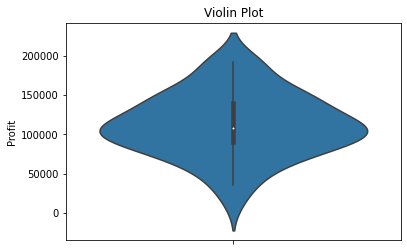

In [9]:
# Create a violin plot
sns.violinplot(y='Profit', data=dataset)
plt.title("Violin Plot")
plt.ylabel('Profit');

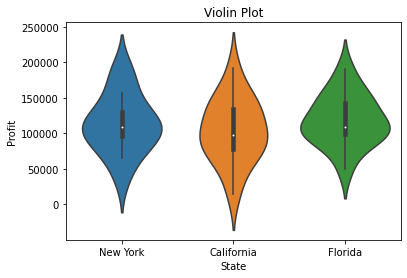

In [10]:
# Add an X Variable
sns.violinplot(x='State', y='Profit', data=dataset)
plt.title("Violin Plot")
plt.xlabel('State');
plt.ylabel('Profit');

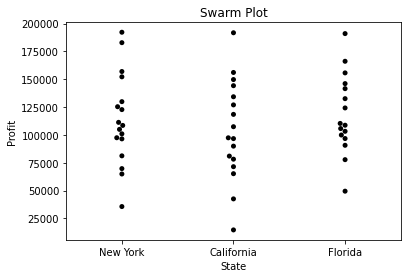

In [11]:
# Change the Color
sns.swarmplot(x='State', y='Profit', data=dataset, color ='black')
plt.title("Swarm Plot")
plt.xlabel('State');
plt.ylabel('Profit');

<AxesSubplot:xlabel='State', ylabel='Profit'>

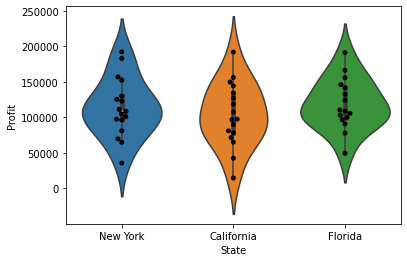

In [12]:
# Overlaying Plots
sns.violinplot(x='State', y='Profit', data=dataset)
sns.swarmplot(x='State', y='Profit', data=dataset, color ='black')

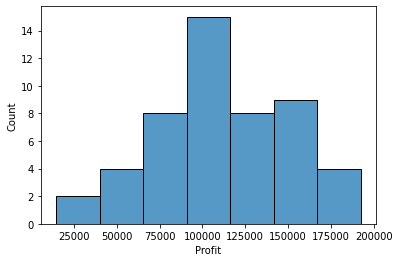

In [13]:
# Create a histogram
sns.histplot(dataset['Profit']);

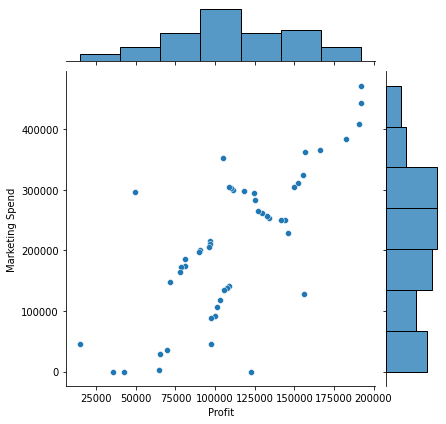

In [14]:
# Combine plots
sns.jointplot(x='Profit', y='Marketing Spend', data=dataset)

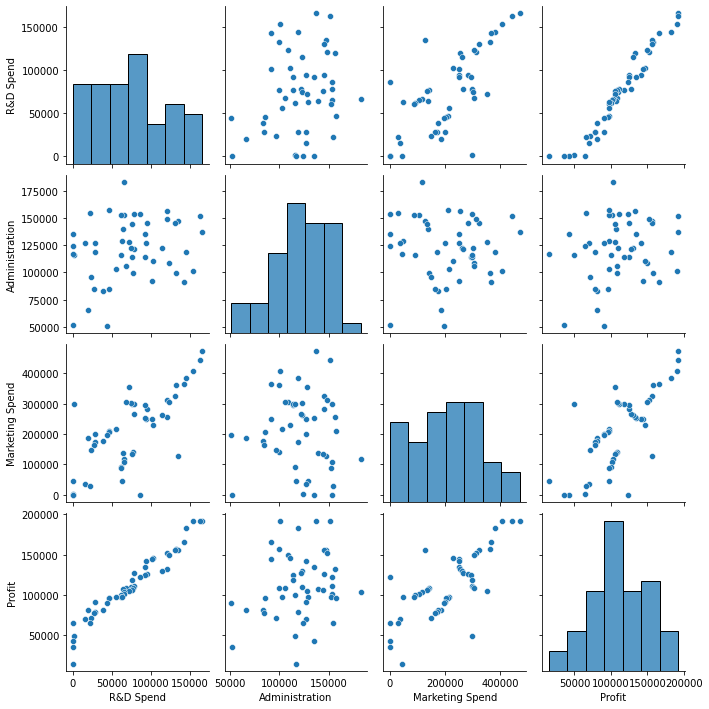

In [15]:
# Plot multiple pairwise bivariate distributions in a dataset
sns.pairplot(data=dataset)

In [16]:
 # Look at the data types
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [17]:
# Look for null values and sum the occurences
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [18]:
# Count the string categories
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [19]:
# Encode the string or state columns
dataset = pd.get_dummies(dataset, drop_first=True)

In [20]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [21]:
# Load in the ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
# Check the columns
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [23]:
# Define our variables (we want to predict Profit)
features = ['R&D Spend', 'Administration', 'Marketing Spend',
       'State_Florida', 'State_New York']
target = ['Profit']

In [24]:
# X & y (from basic Linear Regression equation)
X = dataset[features]
y = dataset[target]

In [25]:
# Create a training and test set (test 20%, train 80%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
# Fit the data to our ML model
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
y_pred

array([[133749.91948852],
       [126771.56418161],
       [ 97712.50105   ],
       [ 58138.82512327],
       [128196.53673201],
       [192274.03929239],
       [ 75126.75206534],
       [127984.52000746],
       [101453.65842151],
       [151532.50862832]])

In [57]:
y_test

,Profit
10,146121.95
13,134307.35
30,99937.59
46,49490.75
18,124266.90
0,192261.83
40,78239.91
12,141585.52
29,101004.64
8,152211.77


In [27]:
# Check the model performance (the accuracy of the model)
r2_score(y_test, y_pred)

0.9667998486975283

In [28]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [29]:
# Add Prediction column at location 4 (after Profit column)
dataset.insert(4, 'Predictions', lin.predict(X))
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,Predictions,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,192274.039292,0,1
1,162597.70,151377.59,443898.53,191792.06,188185.066166,0,0
2,153441.51,101145.55,407934.54,191050.39,180338.371448,1,0
3,144372.41,118671.85,383199.62,182901.99,173097.905882,0,1
4,142107.34,91391.77,366168.42,166187.94,170196.772368,1,0


In [30]:
# Save as csv
dataset.to_csv('full_dataset.csv')